## Setup

In [38]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [40]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\surya/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-1-11 Python-3.11.4 torch-2.1.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## Make Detections w/ Images

In [4]:
img = 'cars.jpg' # add your own image and the correct file path here

In [5]:
results = model(img)
results.print()

FileNotFoundError: [Errno 2] No such file or directory: 'cars.jpg'

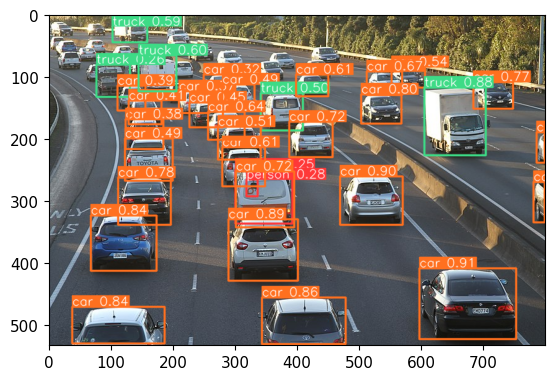

In [8]:
%matplotlib inline
plt.imshow(np.squeeze(results.render())) # np.squeeze because the image array is 3-dimensional
plt.show()

## Realtime Detection

In [41]:
cap = cv2.VideoCapture(0) # You can make it analyze videos by replacing 0 with a file path (Ex. 'C:\\Users\\surya\\Downloads\\traffic-vid.mp4')
while cap.isOpened():
    ret, frame = cap.read()

    # make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    # checks for 'q' key presses every 10 seconds and breaks the loop
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# closes window
cap.release()
cv2.destroyAllWindows()

## Train From Scratch

In [11]:
import uuid # create unique id for each image
import os
import time

In [6]:
IMAGES_PATH = os.path.join('data', 'images') # /data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [30]:
cap = cv2.VideoCapture(0)

# loop through labels
for label in labels:
    print('Collecting images for {}'.format(labels))
    time.sleep(5)

    # loop through images
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))

        # webcam feed
        ret, frame = cap.read()

        # naming image files
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        # print(imgname)

        # writes image to file
        cv2.imwrite(imgname, frame)

        # render to screen
        cv2.imshow('Image Collection', frame)

        # 2 sec delay between image captures
        time.sleep(2)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# closes window
cap.release()
cv2.destroyAllWindows()

In [31]:
# trains the model with the following instructions: 320 images, 16 batch size, and 500 epochs with the classes listed in dataset.yaml and the weights from yolov5.pt
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt 

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
From https://github.com/ultralytics/yolov5
   9abbef5..de64179  master     -> origin/master
github:  YOLOv5 is out of date by 1 commit. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-271-g9abbef5 Python-3.11.4 torch-2.1.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum

In [32]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp9/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\surya/.cache\torch\hub\master.zip
YOLOv5  2024-1-11 Python-3.11.4 torch-2.1.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [33]:
img = os.path.join('data', 'images', 'awake.7cee4ac2-b0ee-11ee-9caa-c8cb9e79d2e4.jpg') # testing a model with a random image

In [34]:
results = model(img)

In [35]:
results.print()

image 1/1: 480x640 1 awake
Speed: 54.8ms pre-process, 120.1ms inference, 16.6ms NMS per image at shape (1, 3, 480, 640)


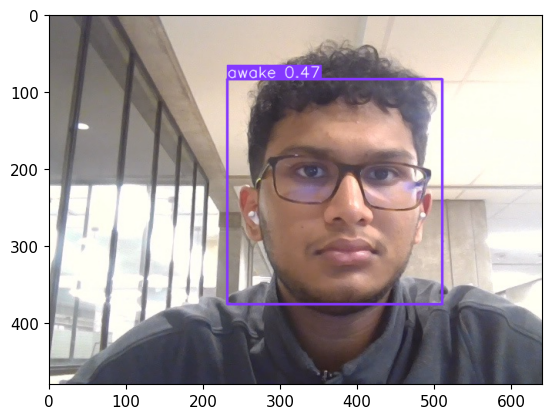

In [36]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))

In [37]:
cap = cv2.VideoCapture(0) # You can make it analyze videos by replacing 0 with a file path (Ex. 'C:\\Users\\surya\\Downloads\\traffic-vid.mp4')
while cap.isOpened():
    ret, frame = cap.read()

    # make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    # checks for 'q' key presses every 10 seconds and breaks the loop
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# closes window
cap.release()
cv2.destroyAllWindows()